# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# INITIAL ANALYSIS

In [ ]:
df=pd.read_excel('loan-data.xlsx')

In [ ]:
df.drop(["Unnamed: 0", "id", "member_id"], axis=1, inplace=True)

In [ ]:
df.head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,...,1.0,0.000000,0.00,0.00,0.00,2023-01-07,0.00,2023-01-07,2023-01-07,1
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,...,10.0,3075.291779,3075.29,2500.00,575.29,2023-07-13,90.85,2023-08-13,2023-06-16,0
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,...,15.0,2948.760000,2948.76,1909.02,873.81,2023-11-11,175.67,NaT,2023-03-12,1
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,...,20.0,8082.391880,8082.39,7000.00,1082.39,2023-03-14,1550.27,NaT,2023-03-14,0


# FILLING OR DROPPING NULL VALUES

In [ ]:
df.isnull().sum()

loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_rec_int                 1
last_pymnt_d                 71
last_pymnt_amnt               1
next_pym

In [ ]:
# Let's drop the 'next_pymnt_d' column and the 'mths_since_last_delinq' column as they contain alot of NaN values
df.drop(["next_pymnt_d", "mths_since_last_delinq"], axis=1, inplace=True)

The code below loops through the columns in the DataFrame. It checks the dtype of each column.

Columns with datetime data are dropped.

Object columns are filled with the most frequent value.

Numeric columns are filled with the mean value.

In [ ]:
# Fill missing values
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        df.drop(columns=[col], inplace=True)
    elif df[col].dtype == 'object':
        df[col].fillna(df[col].value_counts().index[0], inplace=True)
    elif df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
repay_fail             0
dtype: int64

# ENCODING CATEGORICAL VARIABLES

In [ ]:
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Use the mapping to replace the strings with integers
df['emp_length'] = df['emp_length'].replace(emp_length_mapping)

verification_status_mapping = {
    'Not Verified': 0,
    'Verified': 1,
    'Source Verified': 1
}

df['verification_status'] = df['verification_status'].replace(verification_status_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38480 non-null  float64
 1   funded_amnt          38480 non-null  float64
 2   funded_amnt_inv      38480 non-null  float64
 3   term                 38480 non-null  object 
 4   int_rate             38480 non-null  float64
 5   installment          38480 non-null  float64
 6   emp_length           38480 non-null  int64  
 7   home_ownership       38480 non-null  object 
 8   annual_inc           38480 non-null  float64
 9   verification_status  38480 non-null  int64  
 10  loan_status          38480 non-null  object 
 11  purpose              38480 non-null  object 
 12  zip_code             38480 non-null  object 
 13  addr_state           38480 non-null  object 
 14  dti                  38480 non-null  float64
 15  delinq_2yrs          38480 non-null 

Let's encode all categorical features using OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ['term', 'home_ownership', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'revol_util']
for col in categorical_cols:
  df[col] = df[col].astype(str)

ordinal_encoder = OrdinalEncoder()
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38480 non-null  int64  
 1   member_id            38480 non-null  int64  
 2   loan_amnt            38480 non-null  float64
 3   funded_amnt          38480 non-null  float64
 4   funded_amnt_inv      38480 non-null  float64
 5   term                 38480 non-null  float64
 6   int_rate             38480 non-null  float64
 7   installment          38480 non-null  float64
 8   emp_length           38480 non-null  int64  
 9   home_ownership       38480 non-null  float64
 10  annual_inc           38480 non-null  float64
 11  verification_status  38480 non-null  int64  
 12  loan_status          38480 non-null  float64
 13  purpose              38480 non-null  float64
 14  zip_code             38480 non-null  float64
 15  addr_state           38480 non-null 

# TRAIN TEST SPLIT

In [ ]:
X = df.drop(['repay_fail'], axis=1)
y= df['repay_fail']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODEL TRAINING AND PREDICTIONS

## UTILITY FUNCTIONS

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Precision, Recall, F1-score
def print_metrics(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary")
    print(f"{model_name} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}\n")

# Classification Report
def print_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"])
    print(f"{model_name} Classification Report:")
    print(report)

## LOGISTIC REGRESSION MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


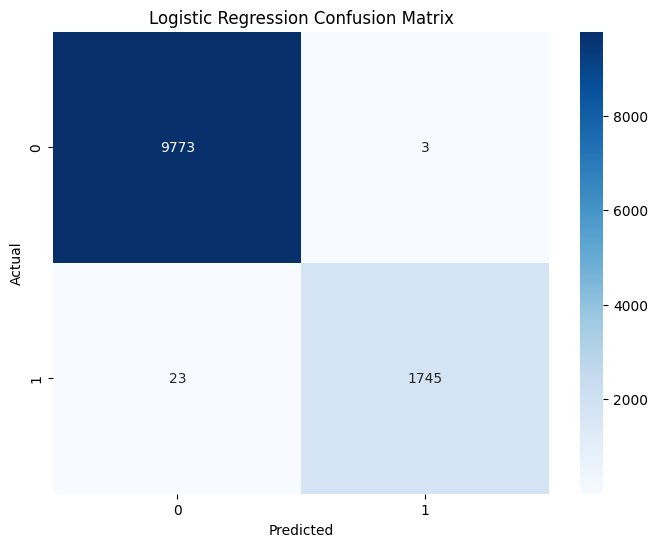

Logistic Regression Metrics:
Precision: 1.00
Recall: 0.99
F1-Score: 0.99

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      9776
     Class 1       1.00      0.99      0.99      1768

    accuracy                           1.00     11544
   macro avg       1.00      0.99      1.00     11544
weighted avg       1.00      1.00      1.00     11544



In [ ]:
from sklearn.linear_model import LogisticRegression


# Logistic Regression
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

plot_confusion_matrix(y_test, logreg_pred, "Logistic Regression Confusion Matrix")
print_metrics(y_test, logreg_pred, "Logistic Regression")
print_classification_report(y_test, logreg_pred, "Logistic Regression")


## RANDOM FOREST MODEL

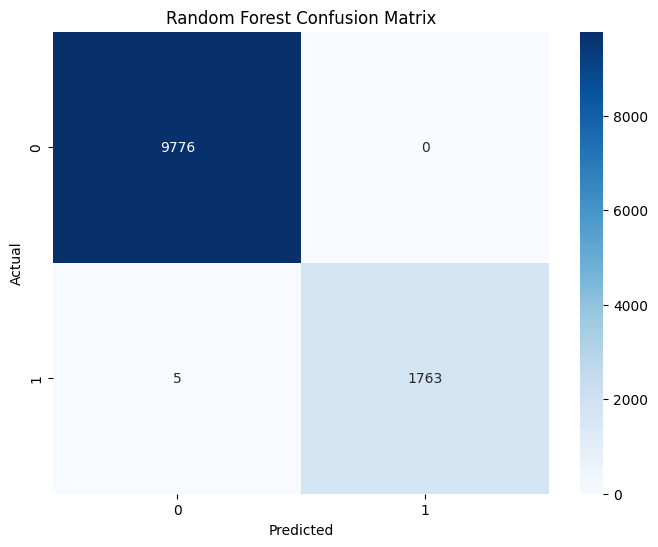

Random Forest Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Random Forest Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      9776
     Class 1       1.00      1.00      1.00      1768

    accuracy                           1.00     11544
   macro avg       1.00      1.00      1.00     11544
weighted avg       1.00      1.00      1.00     11544



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
print_metrics(y_test, rf_pred, "Random Forest")
print_classification_report(y_test, rf_pred, "Random Forest")


## ADABOOST MODEL

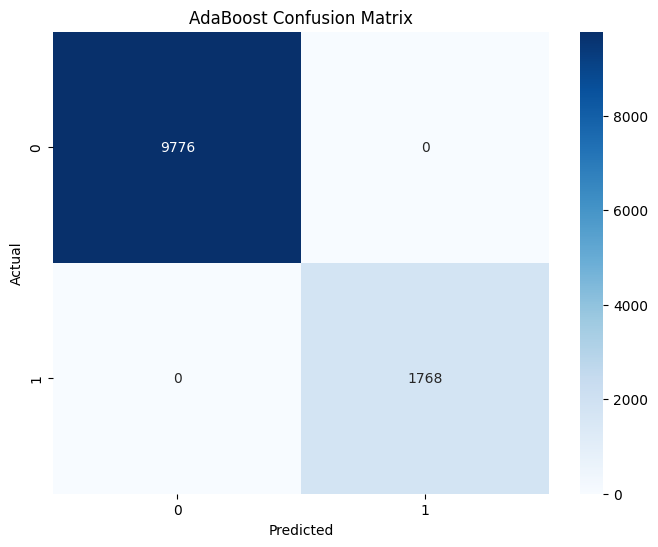

AdaBoost Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

AdaBoost Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      9776
     Class 1       1.00      1.00      1.00      1768

    accuracy                           1.00     11544
   macro avg       1.00      1.00      1.00     11544
weighted avg       1.00      1.00      1.00     11544



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)

plot_confusion_matrix(y_test, adaboost_pred, "AdaBoost Confusion Matrix")
print_metrics(y_test, adaboost_pred, "AdaBoost")
print_classification_report(y_test, adaboost_pred, "AdaBoost")


In [ ]:
# import pandas as pd
# from scipy.stats import pointbiserialr, pearsonr

# target = 'repay_fail'
# threshold = 0.1

# dropped = []
# for col in df.columns:
#     if col != target:
#         if df[col].dtype == 'object':
#             corr = pointbiserialr(df[target], df[col].astype('category').cat.codes)[0]
#         else:
#             corr = pearsonr(df[target], df[col])[0]

#         if abs(corr) < threshold:
#             df.drop(col, axis=1, inplace=True)
#             dropped.append((col, corr))

# print("Dropped features below threshold {}:".format(threshold))
# for name, corr in dropped:
#     print(name, corr)



Dropped features below threshold 0.1:
id -0.008376661866877995
member_id -0.011848967021757296
loan_amnt 0.0422514398287386
funded_amnt 0.03930587851076375
funded_amnt_inv 0.009549356798575796
installment 0.020603877917057766
emp_length -0.010399171211198582
home_ownership 0.020970227467917102
annual_inc -0.03795636576364568
verification_status 0.030799376100171763
purpose 0.046162917160771214
zip_code 0.02000571373175935
addr_state -0.022025117465137425
dti 0.042095679877004355
delinq_2yrs 0.02048109544721414
open_acc -0.006319637398778485
pub_rec 0.05088787969293539
revol_bal 0.018896514531178635
revol_util 0.09272087623536229
total_acc -0.020694724155175433
total_rec_int -0.017393465146317882
